In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
import pandas as pd
import easydarkfigs
%matplotlib inline

In [2]:
%set_darkfigdir figures_dark/
%set_lightfigdir figures/

In [ ]:
%%time
from results import models, results, pcmds, data, radii_am, radii_kpc, dmods, regions

M87


In [ ]:
%%time
from drivers import filters, iso_models, drivers, sky

In [5]:
def many_pcmd_compares(keys, axes=None):
    n = len(keys)
    if axes is None:
        fig, axes = plt.subplots(ncols=n, figsize=(5*(n+1), 6))
    for i, k in enumerate(keys):
        g = k.split('_')[0]
        a = axes[i]
        ppy.plotting.plot_pcmd_contours(data[k], color='k', alpha=0.5, label='Data', ax=a)
        if k not in pcmds:
            print(f'Modeling best fit for {k}')
            pcmds[k], _ = drivers[g].simulate(results[k].best_model, 128, sky_noise=sky[g], dither=False, mag_system=('ab' if g=='M31' else 'vega'))
        ppy.plotting.plot_pcmd_contours(pcmds[k], color='b', alpha=1.0, label='Model', ax=a)
        ppy.plotting.plot_isochrone(iso_models[g], axes=a, alpha=0.)
    fig.tight_layout()
    return fig, axes

In [6]:
plt.style.use('cook')

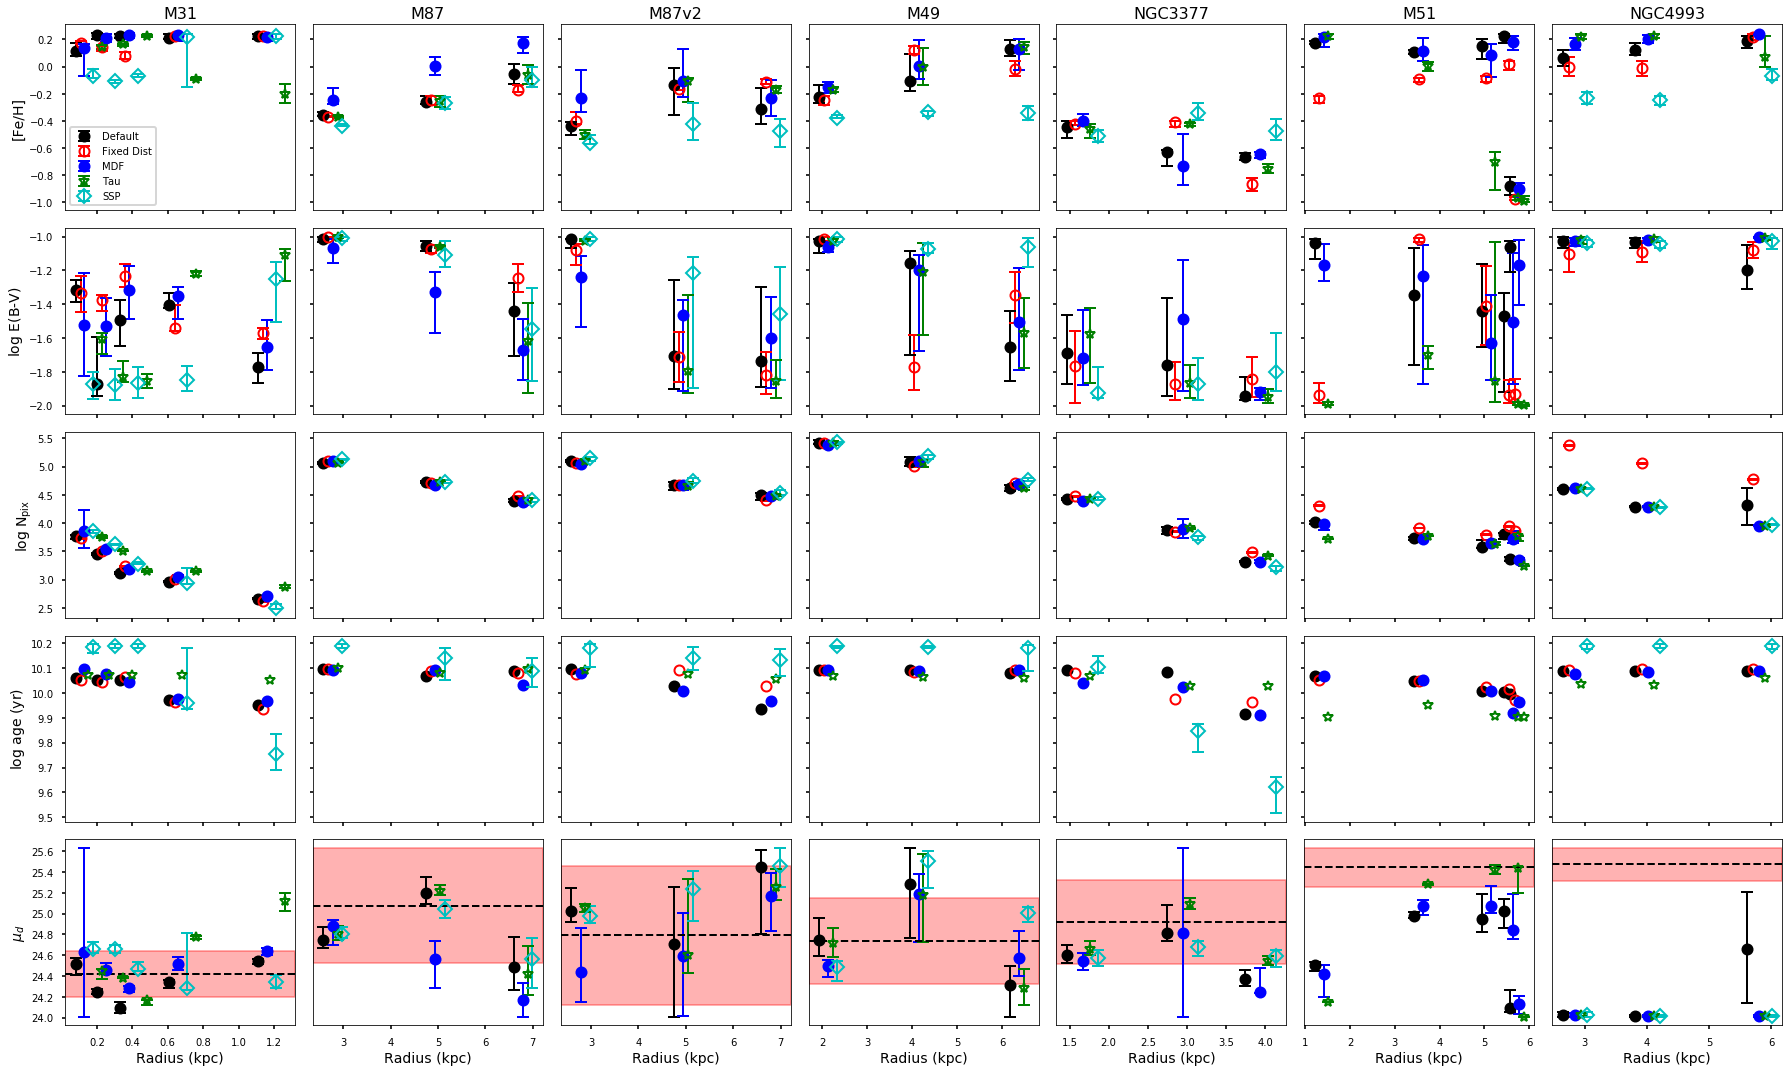

In [7]:
fig, axes = plt.subplots(ncols=7, nrows=5, figsize=(25, 15), sharex='col', sharey='row')
for a in axes[-1]:
    a._shared_y_axes.remove(a)
for i, g in enumerate(['M31', 'M87', 'M87v2', 'M49', 'NGC3377', 'M51', 'NGC4993']):
    a = axes[:,i]
    if g in ['M31', 'M51']:
        rs = ['a', 'b', 'c', 'd', 'e']
    else:
        rs = ['a1', 'b1', 'c1']
    for j, r in enumerate(rs):
        k = f'{g}_{r}_m1'
        c,m,mfc = 'k','o','k'
        dx = (-0.05 if g=='M31' else -0.2)
        results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[4], a[2]], x=radii_kpc[k]+dx, color=c, marker=m, mfc=mfc, label=('Default' if j==0 else None))
        a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)
        
        k = f'{g}_{r}_m2'
        c,m,mfc = 'r','o','None'
        dx = (-0.02 if g=='M31' else -0.1)
        results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[2]], x=radii_kpc[k]+dx,  color=c, marker=m, mfc=mfc,  label=('Fixed Dist' if j==0 else None))
        a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)
        
        k = f'{g}_{r}_m3'
        c,m,mfc = 'b','o','b'
        dx = 0.
        results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[4], a[2]], x=radii_kpc[k]+dx,  color=c, marker=m, mfc=mfc,  label=('MDF' if j==0 else None))
        a[3].plot(radii_kpc[k], results[k].best_model.sfh_model.mean_age, color=c, marker=m, mfc=mfc,  ms=10)
        
        k = f'{g}_{r}_m4'
        c,m,mfc = 'g','*','None'
        dx = (0.02 if g=='M31' else 0.1)
        results[k].plot_errorbars([a[0], a[1], a[2], None, a[4]], x=radii_kpc[k]+0.1,  color=c, marker=m, mfc=mfc,  label=('Tau' if j==0 else None))
        a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)
        
        if g != 'M51':
            k = f'{g}_{r}_m5'
            c,m,mfc = 'c','D','None'
            dx = (0.05 if g=='M31' else 0.2)
            results[k].plot_errorbars(a, x=radii_kpc[k]+dx,  color=c, marker=m, mfc=mfc,  label=('SSP' if j==0 else None))
    #         a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age, marker='o', color='k', ms=10)
    a[-1].axhline(y=dmods[g], ls='--', color='k')
    a[-1].axhspan(dmods[g]-0.22, dmods[g]+0.22, color='r', alpha=0.3)
    a[0].set_title(g)
axes[0,0].legend(loc=0, fontsize=10)
for a in axes[-1]:
    a.set_xlabel('Radius (kpc)')
for i, a in enumerate(axes[:,0]):
    a.set_ylabel(results['M87_a1_m5'].labels[i])
fig.tight_layout()

# M31

In [8]:
for k in [k for k in results.keys() if 'M31' in k]:
    r = results[k]
    if r.df.live.mean() > 0.0:
        print(k, r.as_dynesty()['delta_logz'][-1])
    else:
        print(k, r.as_dynesty()['delta_logz'][-1], '--DONE')
        

M31_a_m1 4.611681492860953e-05 --DONE
M31_b_m1 0.13078605305122437
M31_c_m1 0.0008204757432395127 --DONE
M31_d_m1 0.13903457873925618
M31_e_m1 0.1280952694098687
M31_a_m2 2.2778795027988963e-07 --DONE
M31_b_m2 0.1252411170414689
M31_c_m2 0.0006256293950173131 --DONE
M31_d_m2 0.13364632376465124
M31_e_m2 0.1163302811999074
M31_a_m3 0.0008141322500705428 --DONE
M31_b_m3 0.026522425539269534 --DONE
M31_c_m3 0.04929980809811241 --DONE
M31_d_m3 0.006715431582506426 --DONE
M31_e_m3 0.18232155679288553
M31_a_m4 1.9920630620617885e-06 --DONE
M31_b_m4 0.14398515815423707
M31_c_m4 0.15182821364078336
M31_d_m4 0.10890929469815092
M31_e_m4 0.09953768749687697
M31_a_m5 0.0002079886412502674 --DONE
M31_b_m5 1.1987186553596985e-05 --DONE
M31_c_m5 4.817085937247612e-06 --DONE
M31_d_m5 4.731859007733874e-06 --DONE
M31_e_m5 2.7724581741495058e-08 --DONE


Modeling best fit for M31_b_m1
Modeling best fit for M31_d_m1
Modeling best fit for M31_e_m1


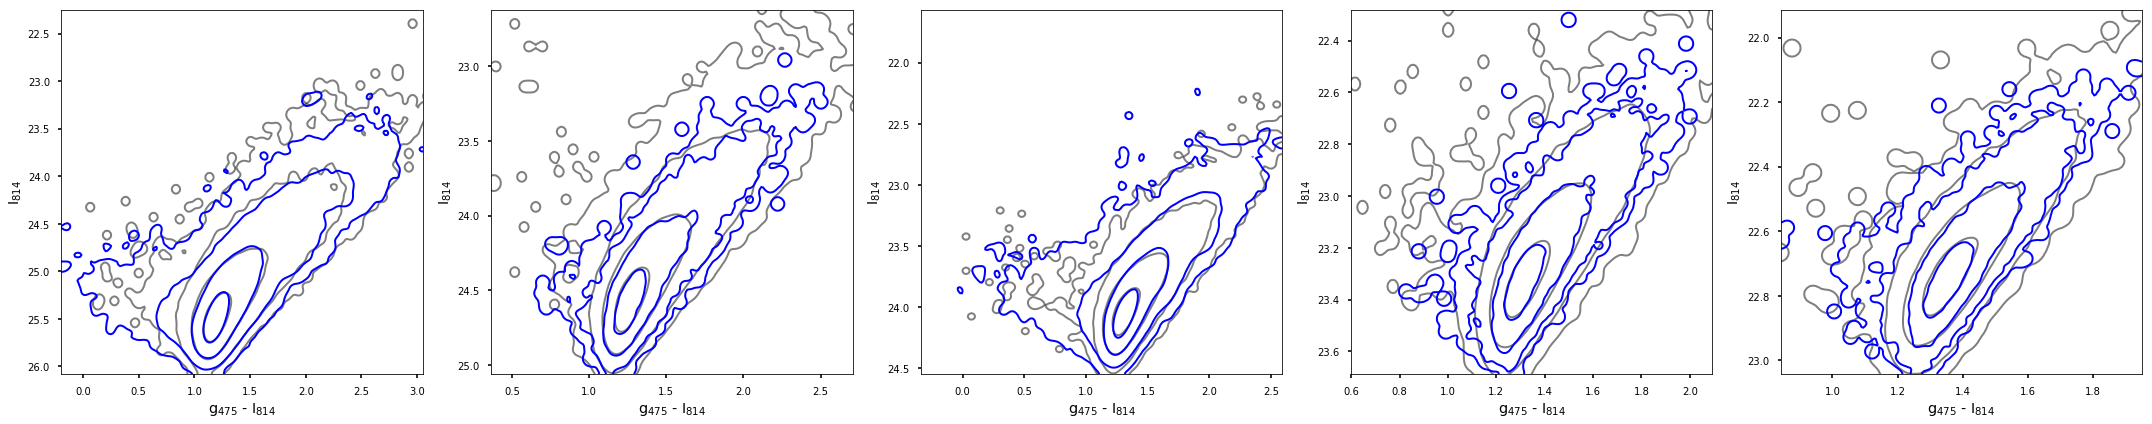

In [9]:
fig, axes = many_pcmd_compares(['M31_a_m1', 'M31_b_m1', 'M31_c_m1', 'M31_d_m1', 'M31_e_m1'])

Modeling best fit for M31_e_m3


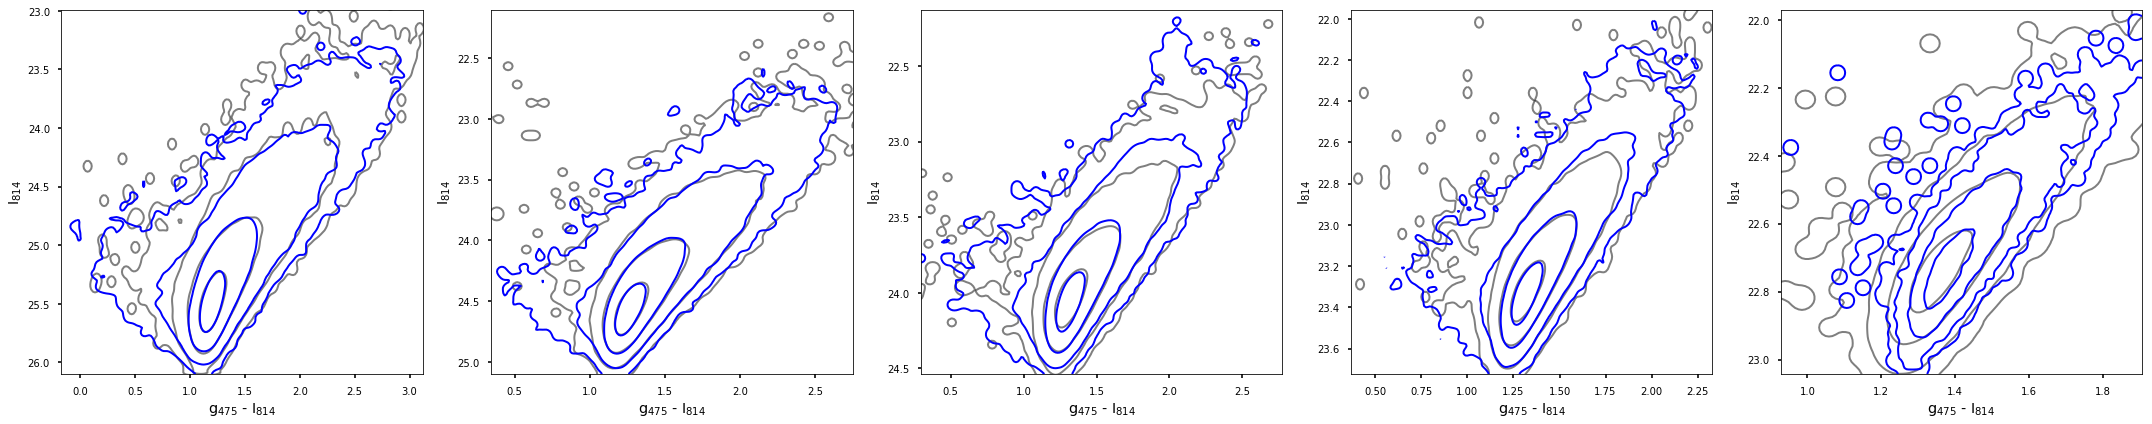

In [10]:
fig, axes = many_pcmd_compares(['M31_a_m3', 'M31_b_m3', 'M31_c_m3', 'M31_d_m3', 'M31_e_m3'])

Modeling best fit for M31_b_m4
Modeling best fit for M31_c_m4
Modeling best fit for M31_d_m4
Modeling best fit for M31_e_m4


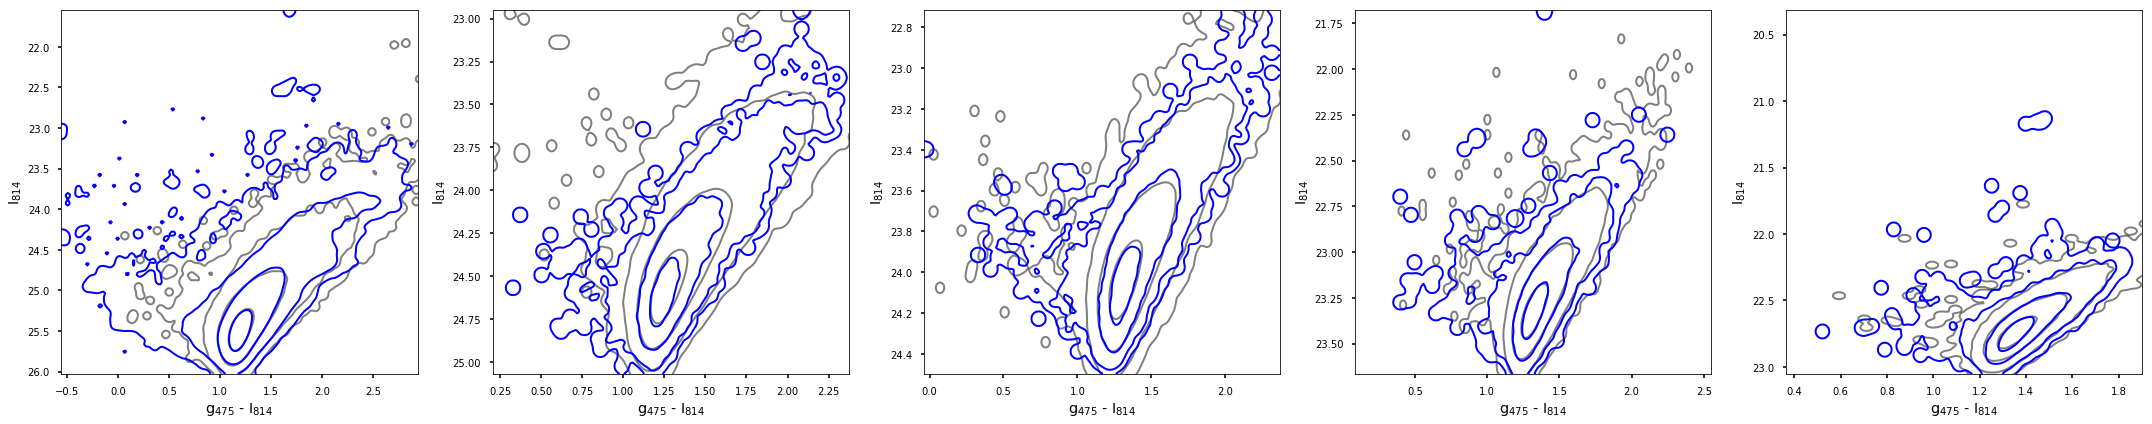

In [11]:
fig, axes = many_pcmd_compares(['M31_a_m4', 'M31_b_m4', 'M31_c_m4', 'M31_d_m4', 'M31_e_m4'])

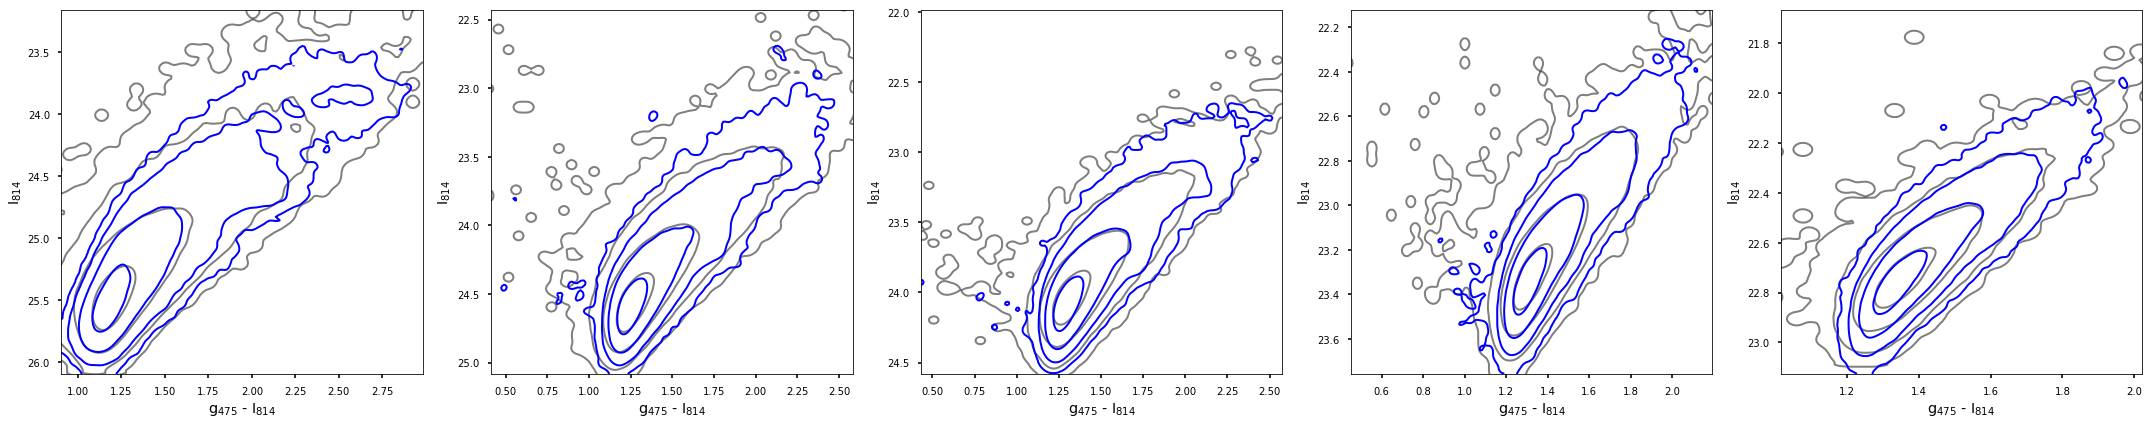

In [13]:
fig, axes = many_pcmd_compares(['M31_a_m5', 'M31_b_m5', 'M31_c_m5', 'M31_d_m5', 'M31_e_m5'])

In [14]:
results['M31_a_m1'].as_dynesty()['logz'][-1]

-1410.244690131056

In [15]:
results['M31_a_m2'].as_dynesty()['logz'][-1]

-1472.7171495497557

In [16]:
results['M31_a_m3'].as_dynesty()['logz'][-1]

-1138.5540193580132

In [17]:
results['M31_a_m4'].as_dynesty()['logz'][-1]

-1868.8646612525072

In [18]:
results['M31_a_m5'].as_dynesty()['logz'][-1]

-3429.826076907573

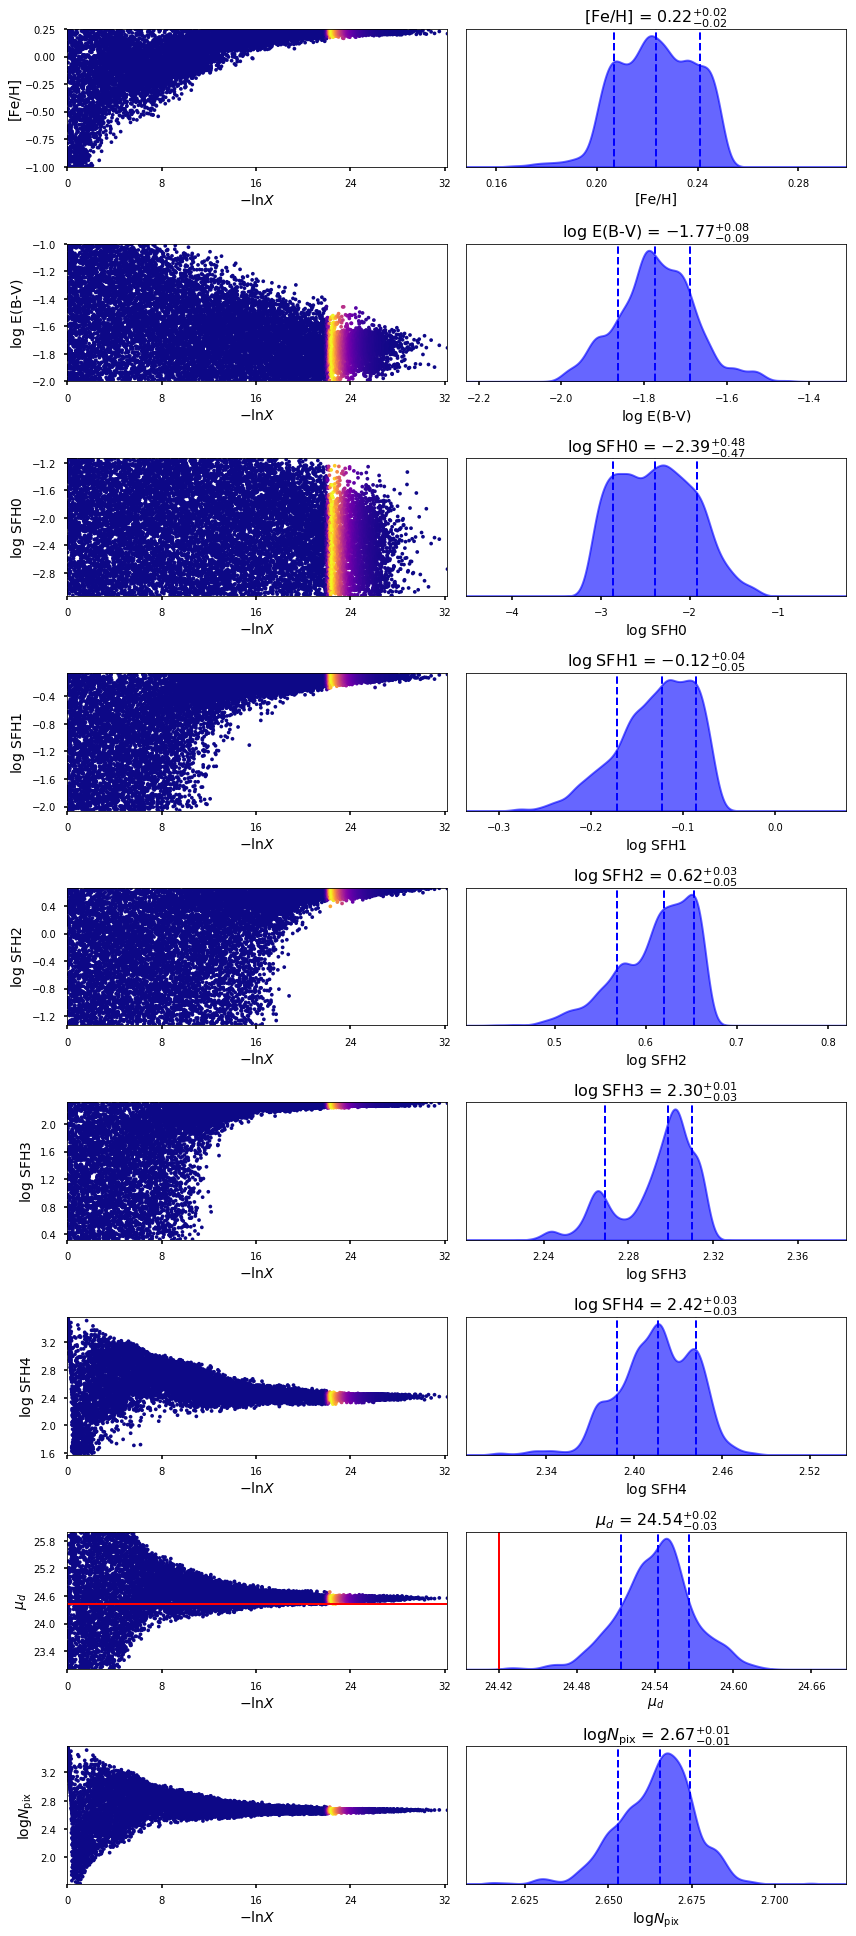

In [20]:
results['M31_a_m1'].plot_trace();

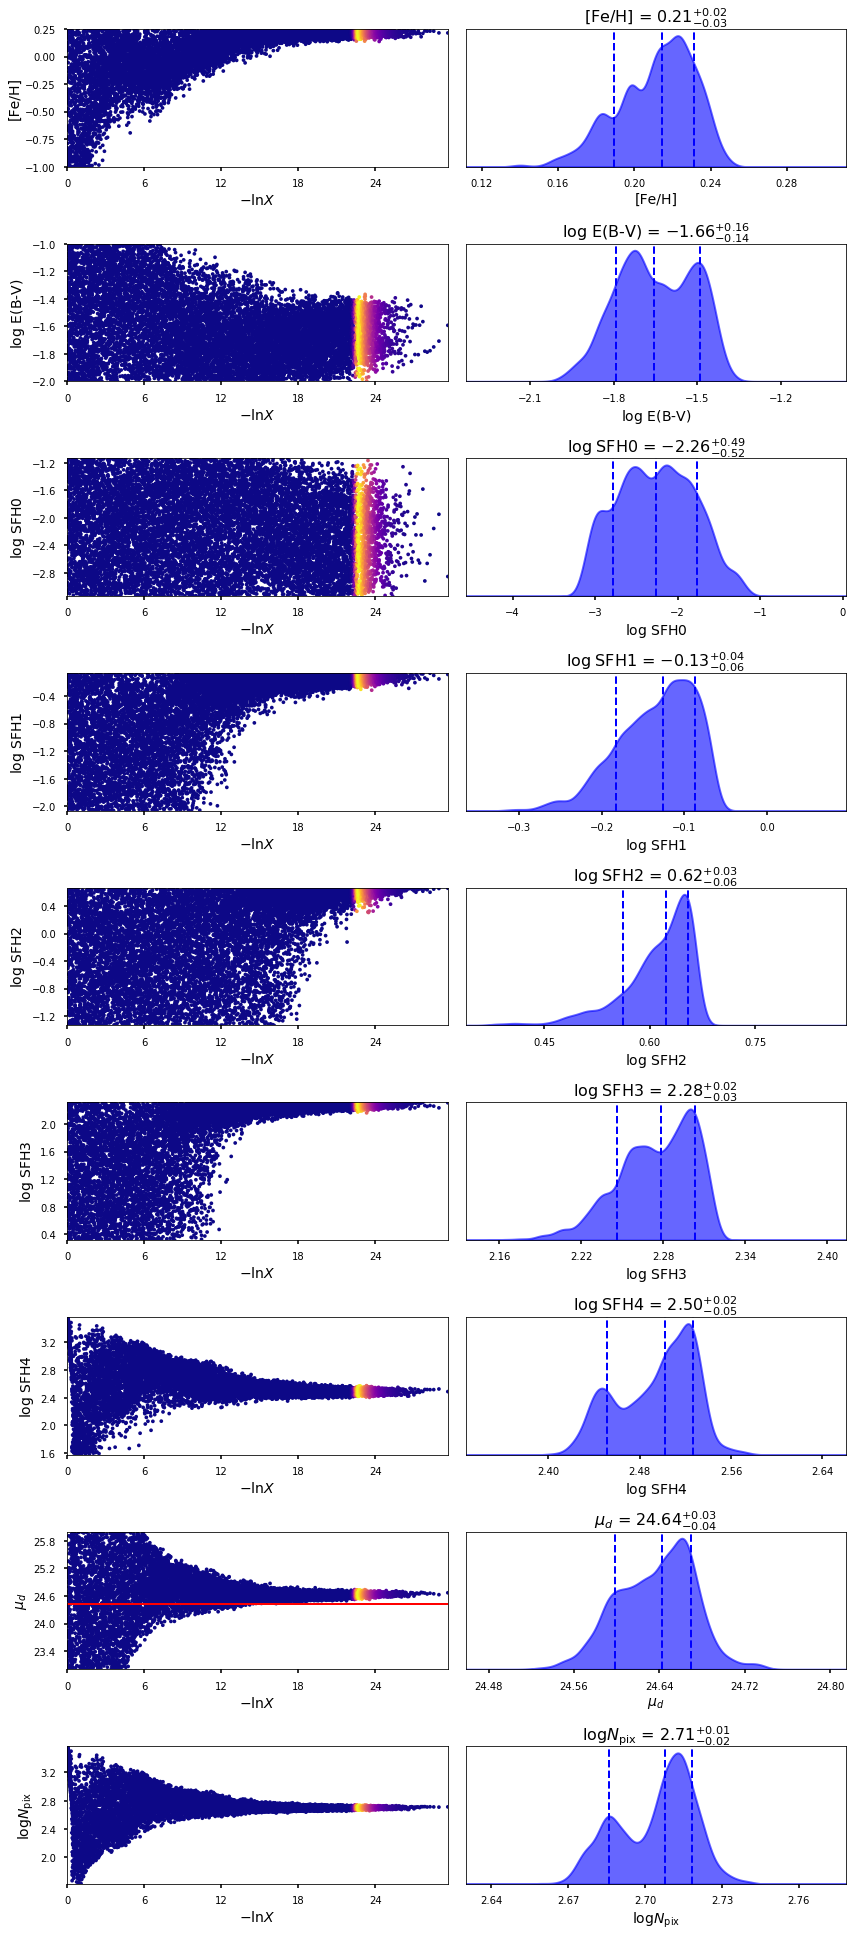

In [21]:
results['M31_a_m3'].plot_trace();

In [8]:
df.head()

NGC4993      NGC3377          M49          M87
4  1138.490722  1854.573996  1808.240871  1859.819654
5  1164.572243  1797.351230  1805.732398  1845.136882
6  1245.960558  1826.770922  1772.004918  1854.262074
7  1081.777732  1811.777403  1813.220218  1867.181817
8  1117.387058  1839.368557  1802.422899  1852.255262

In [9]:
radii_kpc['NGC4993_a1_m5']

nan

In [14]:
radii_kpc['NGC4993_b1_m5']

1.2440475314989907

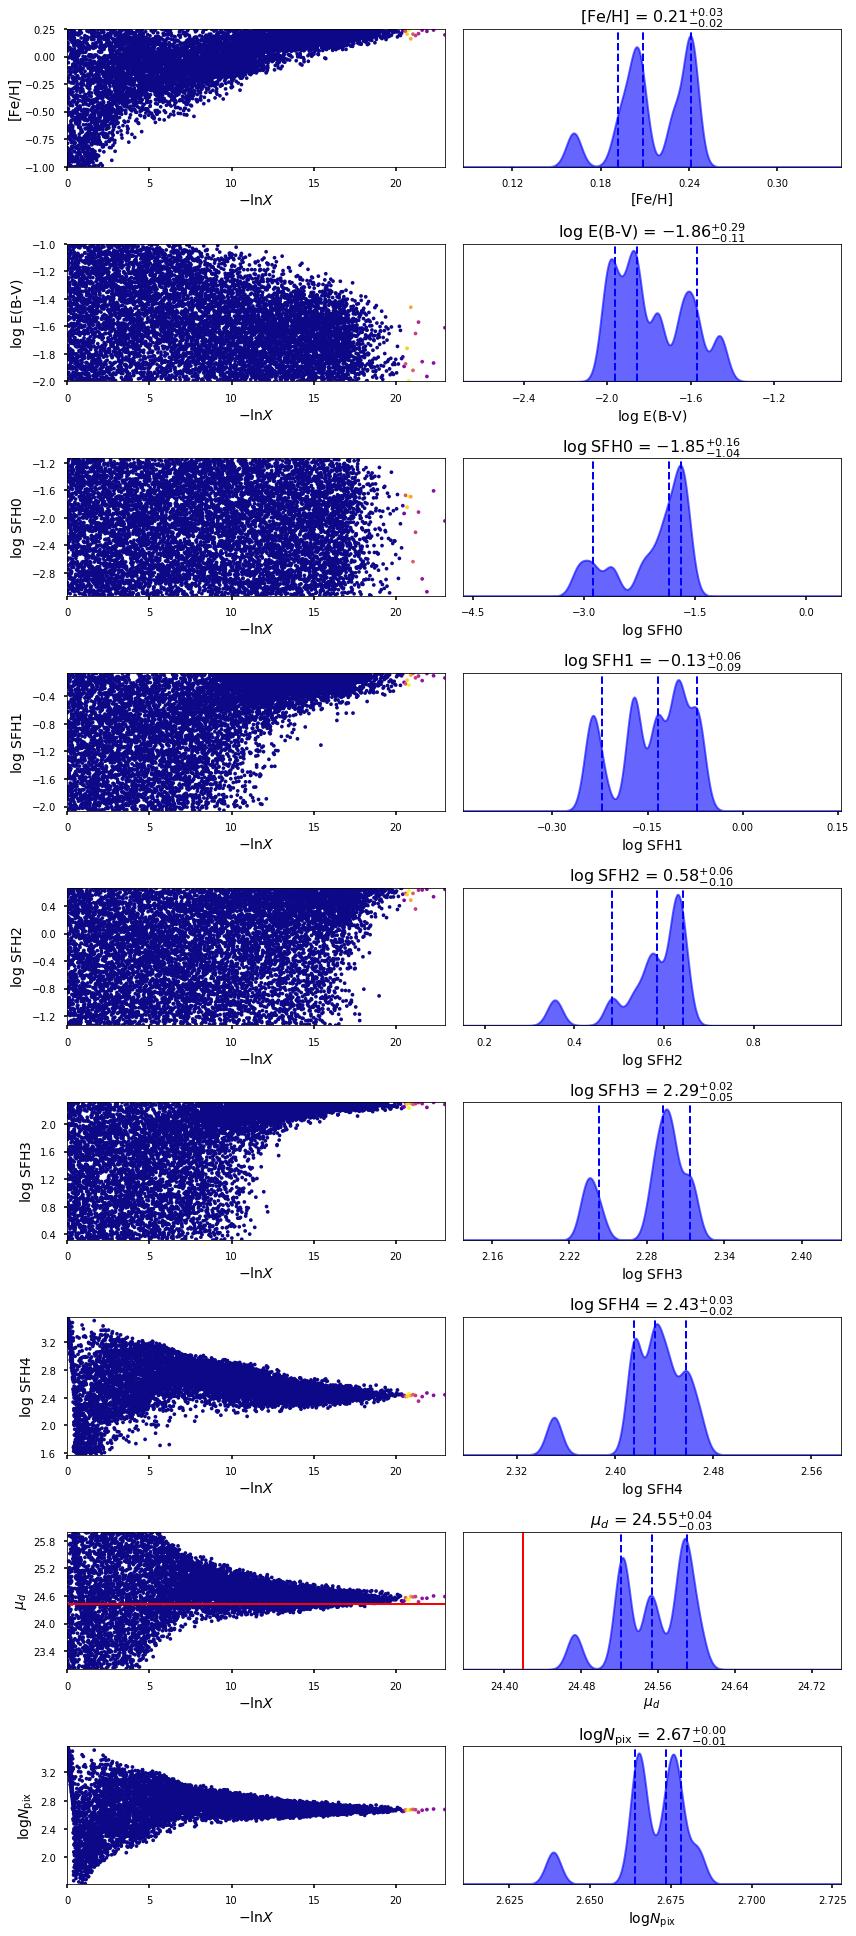

In [30]:
results['M31_a_m1'].plot_trace();

In [25]:
for k in ['NGC4993_a1_m5', 'NGC4993_b1_m5', 'NGC4993_c1_m5']:
    pcmds[k], _ = drivers['NGC4993'].simulate(results[k].best_model, 256, sky_noise=[60.0, 172.1], dither=False)

In [36]:
for k in ['M31_a_m5', 'M31_b_m5', 'M31_c_m5', 'M31_e_m5', 'M31_d_m5']:
    pcmds[k], _ = drivers['M31'].simulate(results[k].best_model, 256, sky_noise=[178.1, 103.5], dither=False, mag_system='ab')

In [24]:
for k in ['NGC4993_a1_m2', 'NGC4993_b1_m2', 'NGC4993_c1_m2']:
    pcmds[k], _ = drivers['NGC4993'].simulate(results[k].best_model, 256, sky_noise=[60.0, 172.1], dither=False)

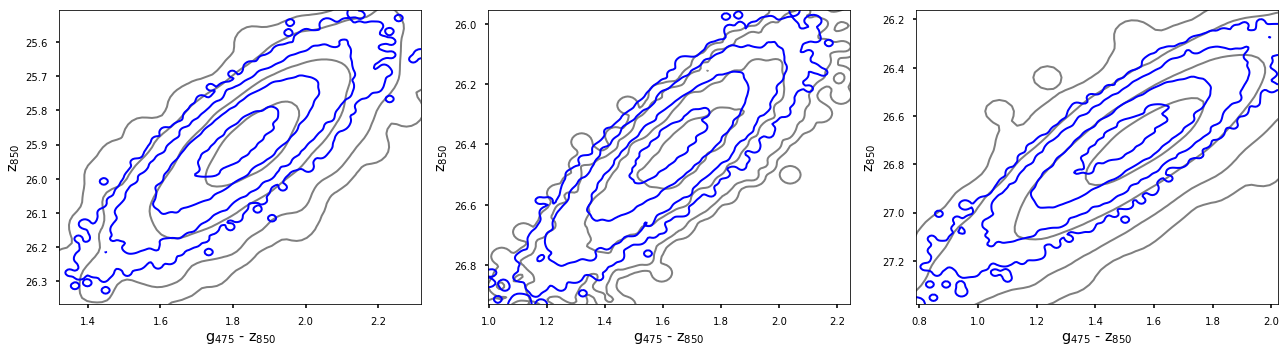

In [26]:
fig, axes = plt.subplots(ncols=3, figsize=(18,5))
for i, k in enumerate(['NGC4993_a1_m5', 'NGC4993_b1_m5', 'NGC4993_c1_m5']):
    ppy.plotting.plot_pcmd_contours(data[k], ax=axes[i], color='k', alpha=0.5)
    ppy.plotting.plot_pcmd_contours(pcmds[k], ax=axes[i], color='b')
    ppy.plotting.plot_isochrone(iso_models['NGC4993'], axes=axes[i], alpha=0.)
# ax.set_ylim([26.5, 25.3])
fig.tight_layout()

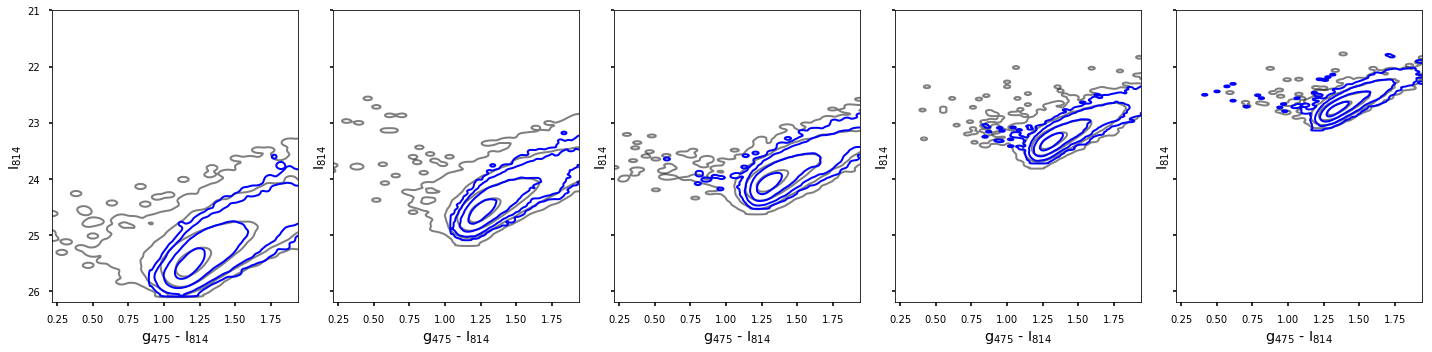

In [38]:
fig, axes = plt.subplots(ncols=5, figsize=(20,5), sharex=True, sharey=True)
for i, k in enumerate(['M31_a_m5', 'M31_b_m5', 'M31_c_m5', 'M31_d_m5', 'M31_e_m5']):
    ppy.plotting.plot_pcmd_contours(data[k], ax=axes[i], color='k', alpha=0.5)
    ppy.plotting.plot_pcmd_contours(pcmds[k], ax=axes[i], color='b')
    ppy.plotting.plot_isochrone(iso_models['M31'], axes=axes[i], alpha=0.)
axes[0].set_ylim([26.2, 21.0])
fig.tight_layout()

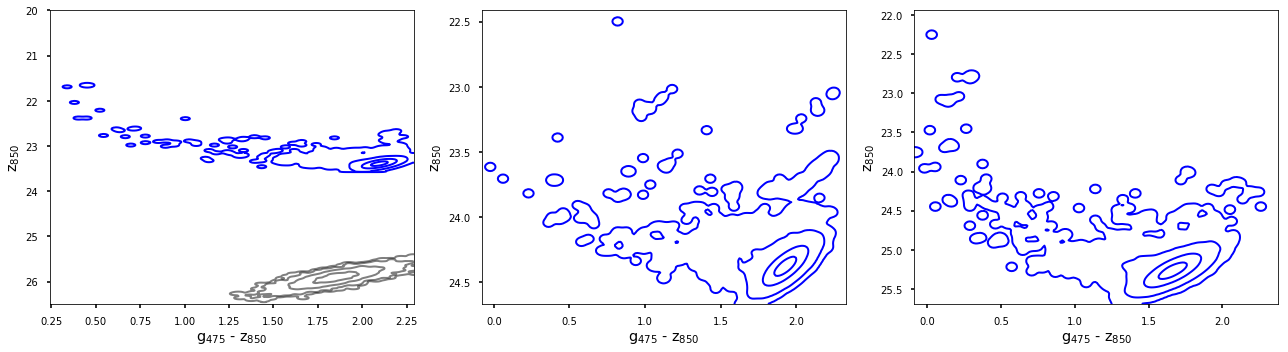

In [27]:
fig, axes = plt.subplots(ncols=3, figsize=(18,5))
for i, k in enumerate(['NGC4993_a1_m2', 'NGC4993_b1_m2', 'NGC4993_c1_m2']):
    ppy.plotting.plot_pcmd_contours(data[k], ax=axes[i], color='k', alpha=0.5)
    ppy.plotting.plot_pcmd_contours(pcmds[k], ax=axes[i], color='b')
    ppy.plotting.plot_isochrone(iso_models['NGC4993'], axes=axes[i], alpha=0.)
axes[0].set_ylim([26.5, 20.])
fig.tight_layout()

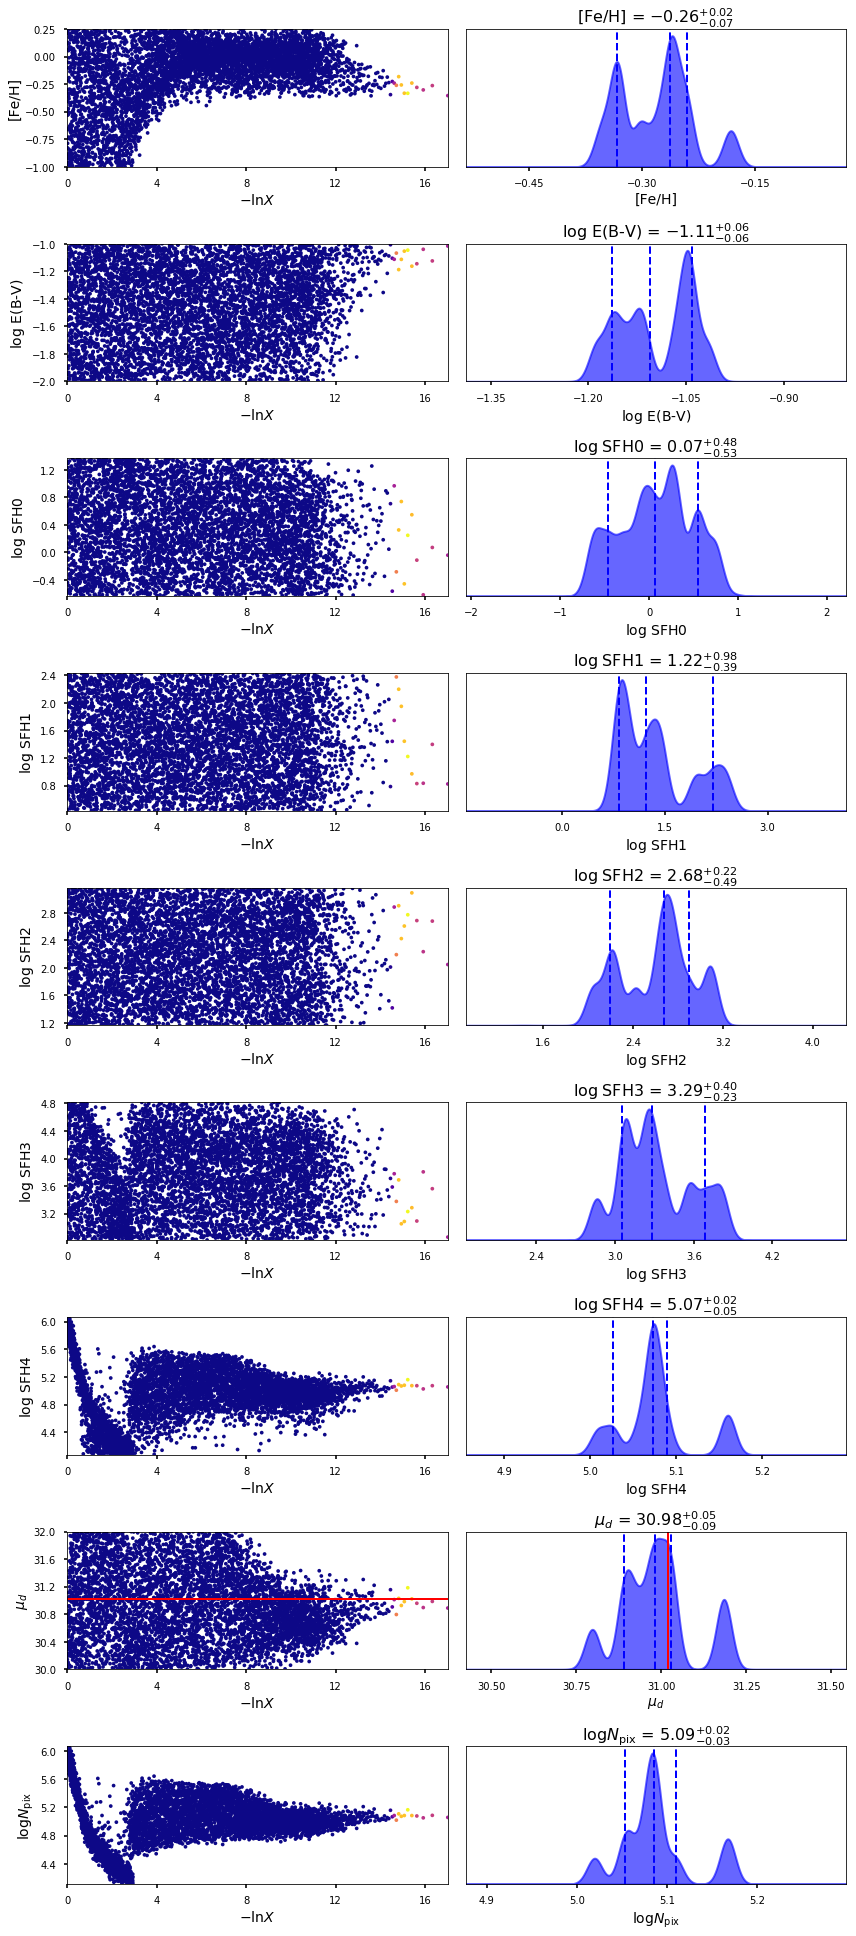

In [7]:
fig, axes = results['M87_a1_m1'].plot_trace();

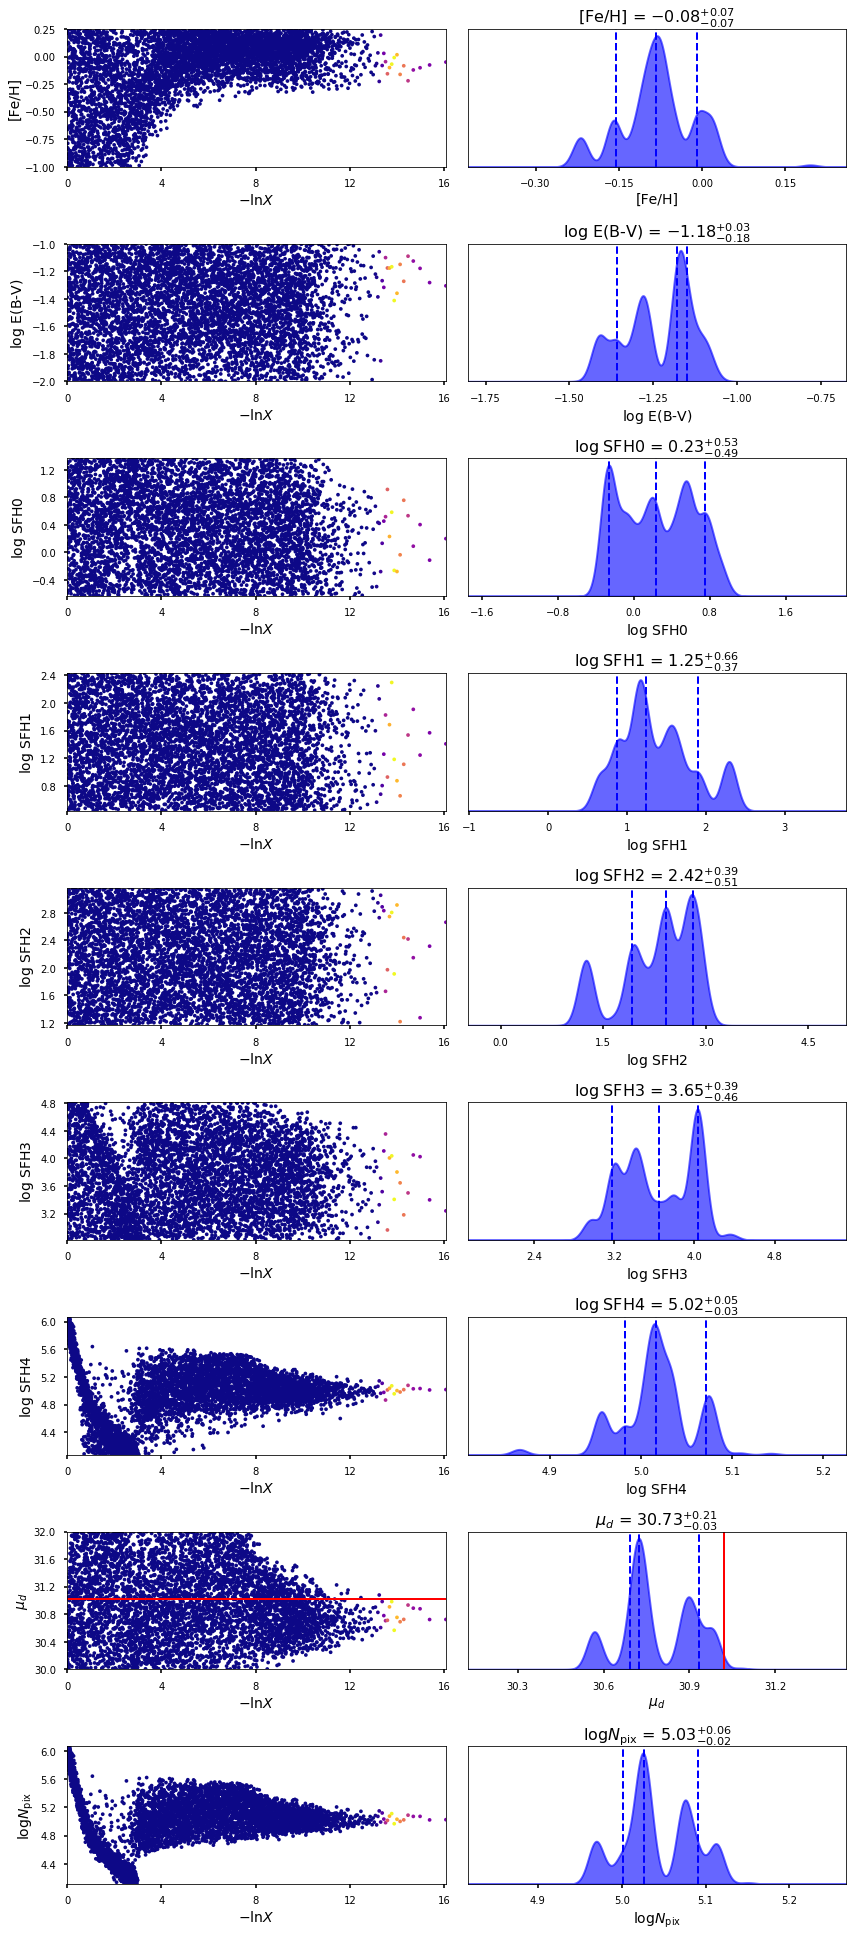

In [8]:
fig, axes = results['M87_a1_m3'].plot_trace();

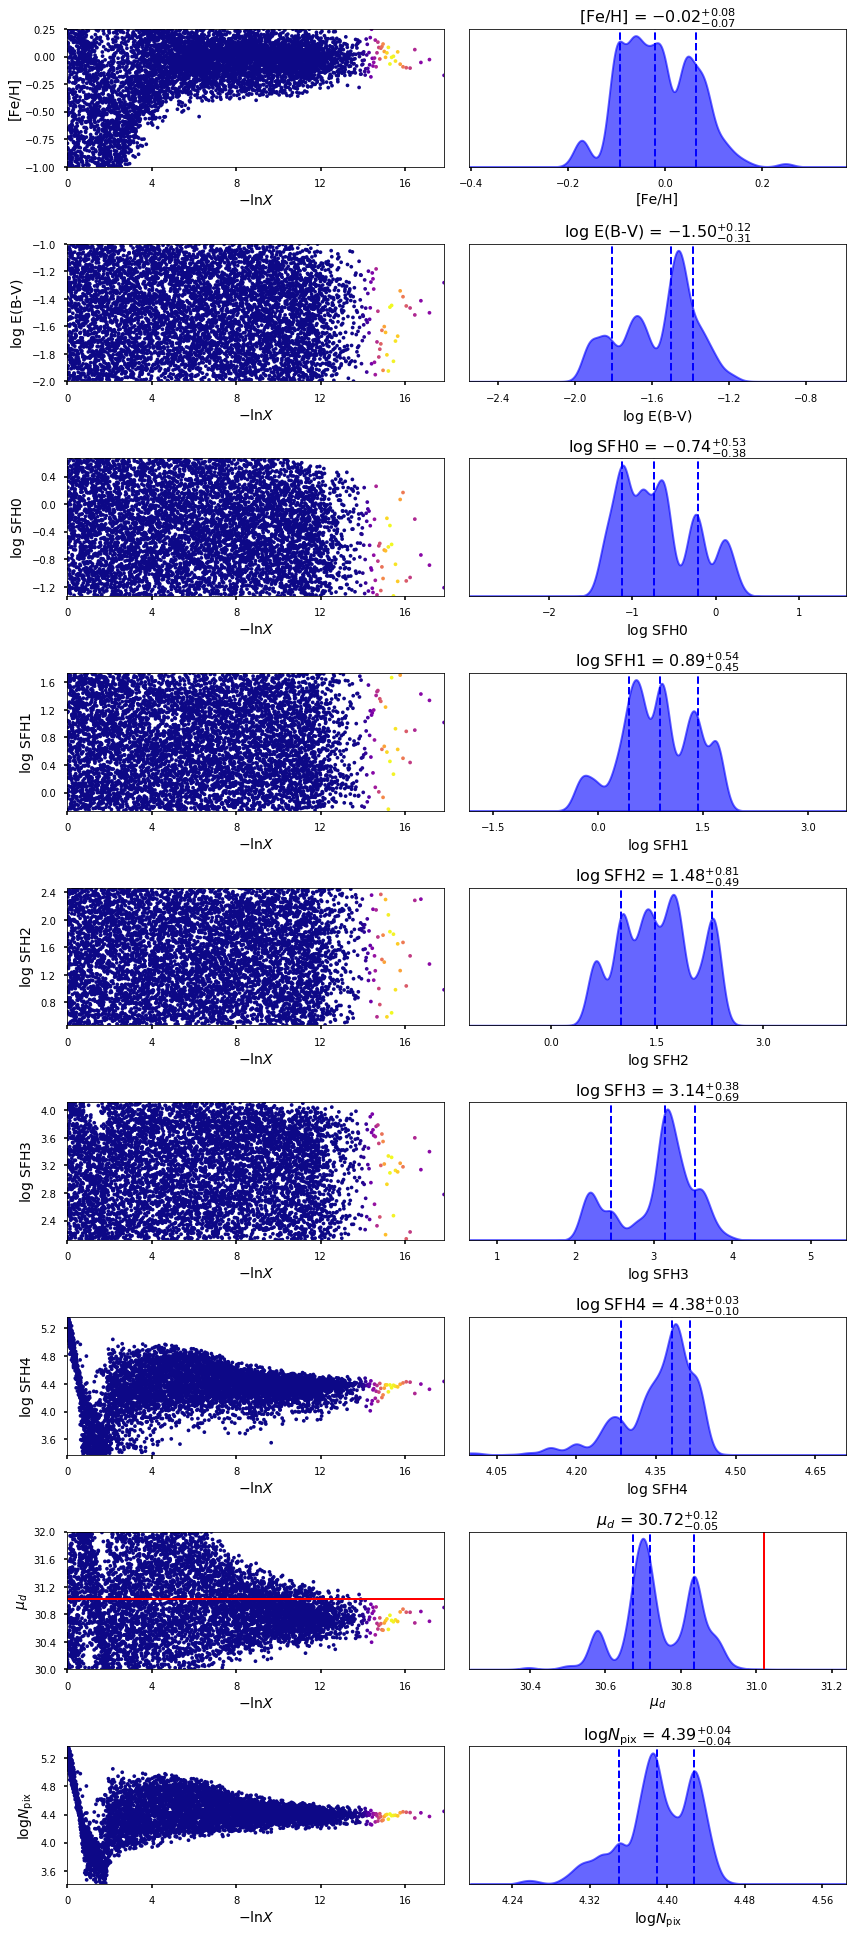

In [9]:
fig, axes = results['M87_c1_m1'].plot_trace();

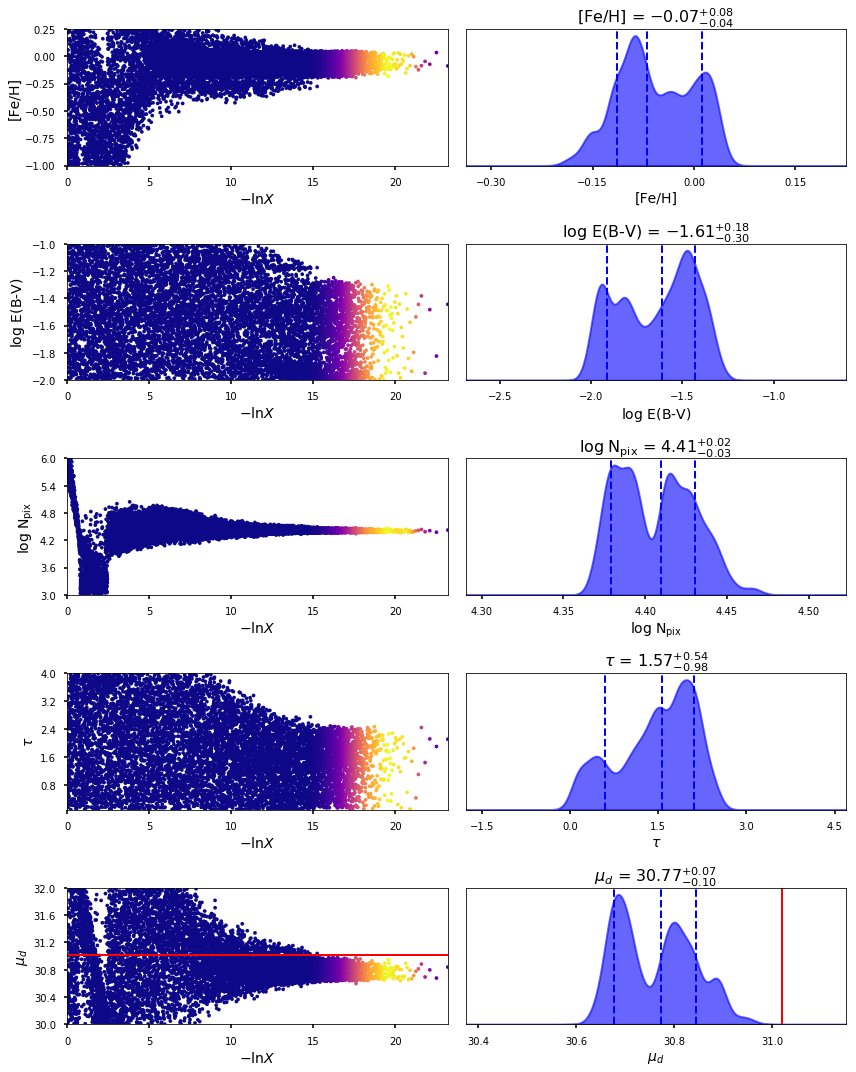

In [10]:
fig, axes = results['M87_c1_m4'].plot_trace();

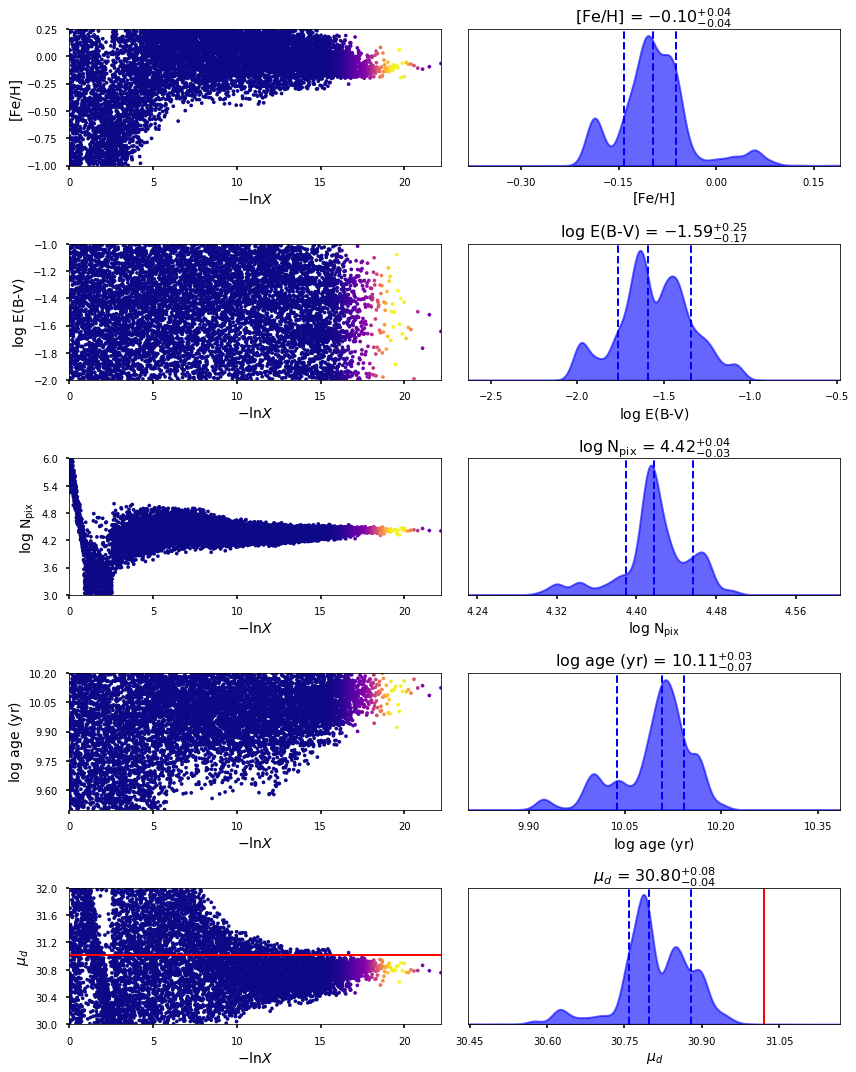

In [11]:
fig, axes = results['M87_c1_m5'].plot_trace();

In [12]:
g = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(),
    ppy.dustmodels.SingleDust(),
    ppy.sfhmodels.SSPModel(),
    ppy.distancemodels.VariableDistance()
)

In [19]:
g = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.3),
    ppy.dustmodels.SingleDust(),
    ppy.sfhmodels.SSPModel(),
    ppy.distancemodels.VariableDistance()
)

In [13]:
test_pcmds = {}
for feh in [0.5, 0.25, 0.0, -0.25, -0.5, -0.75, -1.0]:
    g.set_params(np.array([feh, -2.0, 5.0, 10.0, 30.0]))
    test_pcmds[feh],_ = drivers['NGC3377'].simulate(g, 256)

In [20]:
g.set_params(np.array([0.0, -2.0, 5.0, 10.0, 30.0]))
test_pcmds['MDF'], _ = drivers['NGC3377'].simulate(g, 256)

(24.7, 23.5)

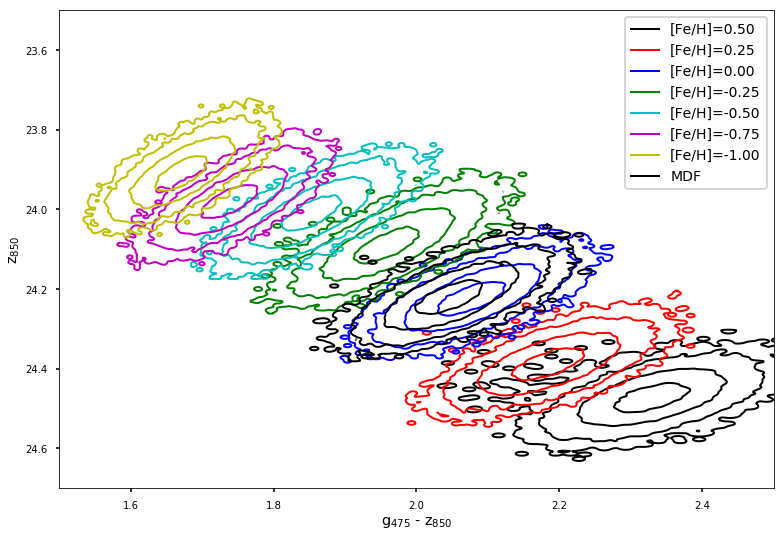

In [22]:
colors = ['k','r','b','g','c', 'm', 'y']
fig, ax = plt.subplots()
for i, (k,v) in enumerate(test_pcmds.items()):
    if k == 'MDF':
        continue
    ppy.plotting.plot_pcmd_contours(v, ax=ax, label=f'[Fe/H]={k:.2f}', color=colors[i])
ppy.plotting.plot_pcmd_contours(test_pcmds['MDF'], ax=ax, label='MDF', color='k', ls=':')
ax.legend(loc=0)
ppy.plotting.plot_isochrone(iso_models['NGC3377'], alpha=0., axes=ax)
ax.set_xlim([1.5, 2.5])
ax.set_ylim([24.7, 23.5])

In [24]:
for k,v in test_pcmds.items():
    print(k, np.std(v,axis=1))

0.5 [0.03569467 0.05096166]
0.25 [0.03901362 0.04924891]
0.0 [0.04176508 0.04727827]
-0.25 [0.04459576 0.04542403]
-0.5 [0.04391592 0.04157494]
-0.75 [0.04281707 0.03825038]
-1.0 [0.04349577 0.03608941]
MDF [0.04210905 0.04631982]


In [16]:
ppy.distancemodels.dmod_to_mpc(31.0)

15.848931924611142

In [17]:
ppy.distancemodels.dmod_to_mpc(30.18)

10.864256236170656

In [18]:
ppy.distancemodels.dmod_to_mpc(33)

39.810717055349734